# ShortestDistance and Forward-Backward

This worksheet shows how to use the `ShortestDistance` and `Reverse` operations, together
with log weights, to obtain the equivalent of the forward-backward algorithm for Hidden Markov Models.

In [82]:
from pylab import *
import openfst
from openfst import StdVectorFst as FST
from openfst import LogVectorFst as LFST
from fstutils import *
figsize(12,4)

# Combining Weights

Let's look at the effects of different weights in some simple example.

Here, we consider an FST in which there are two identical paths with identical weights.
How do they get combined, for example under minimization?

## Log Probabilities

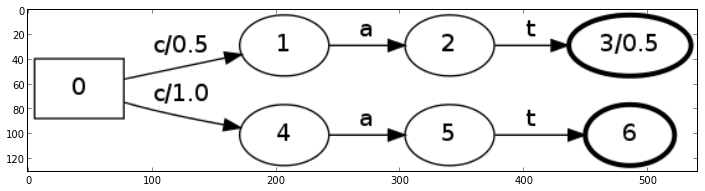

In [84]:
lf = LFST()
lf.AddString("cat",0.5,0.5)
lf.AddString("cat",1.0)
show_fst(lf)

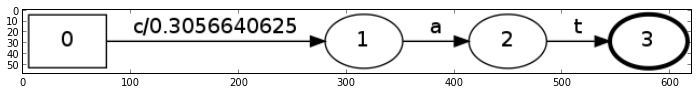

In [85]:
dfst = LFST()
openfst.Determinize(lf,dfst)
openfst.Minimize(dfst)
show_fst(dfst)

As we see here, the two paths get combined by probabilities. That is, each path
can lead to the goal, and the total probability of reaching the goal is the
sum of the probabilities for each path (in the log domain).

In [66]:
log(exp(-1.0)+exp(-1.0))

-0.30685281944005466

## Costs and Minimization

With the regular (log,+) semiring, the costs for each path get added along the path, but the total cost is just the minimum cost of reaching the goal.

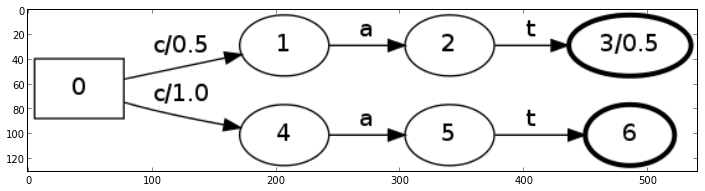

In [86]:
fst = FST()
fst.AddString("cat",0.5,0.5)
fst.AddString("cat",1.0)
show_fst(lf)

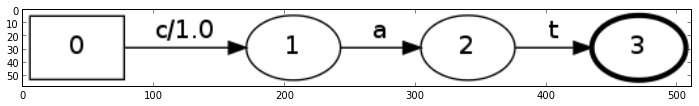

In [87]:
dfst = FST()
openfst.Determinize(fst,dfst)
openfst.Minimize(dfst)
show_fst(dfst)

## Different Weights

Tropical Semiring:

- $\oplus$: associative, commutative, $\bar{0}$ as identity
- $\otimes$: associative, $\bar{1}$ as identity

In [69]:
openfst.Weight()

<openfst.Weight; proxy of <Swig Object of type 'ArcTpl< TropicalWeight >::Weight *' at 0x33dd150> >

In [70]:
openfst.LogWeight()

<openfst.LogWeight; proxy of <Swig Object of type 'ArcTpl< LogWeight >::Weight *' at 0x33dd420> >

In [71]:
openfst.LogWeight.Zero().Value()

inf

In [72]:
openfst.LogWeight.One().Value()

0.0

Built-In Weights

- Boolean
- Real (probabilities)
- Log (log probabilities)
- Tropical (min,+)

Note that you can get n-best paths by defining a new weight class that...

- acts like a `Log` or `Tropical` weight
- also keeps the n-best paths internally on combination

# Viterbi

For getting the equivalent of the Viterbi algorithm, that is the shortest path,
we need to use the semiring (min,+).

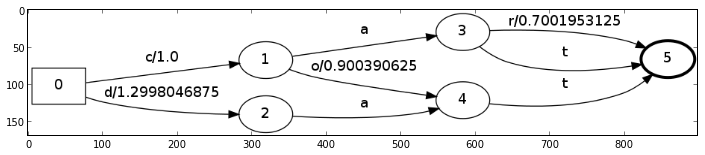

In [73]:
fst = FST()
fst.AddString("cat",1.0)
fst.AddString("cot",1.9)
fst.AddString("car",1.7)
fst.AddString("dat",1.3)
dfst = FST()
openfst.Determinize(fst,dfst)
openfst.Minimize(dfst)
fst = dfst
show_fst(fst)

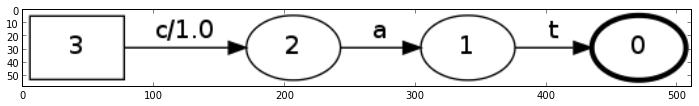

In [74]:
out = FST()
openfst.ShortestPath(fst,out,1)
show_fst(out)

# Forward Backward

For getting the equivalent of the forward-backward algorithm, we need to use log probabilities
as weights.

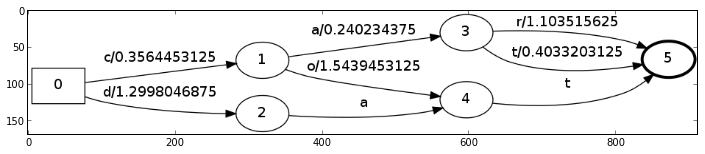

In [75]:
fst = LFST()
fst.AddString("cat",1.0)
fst.AddString("cot",1.9)
fst.AddString("car",1.7)
fst.AddString("dat",1.3)
dfst = LFST()
openfst.Determinize(fst,dfst)
openfst.Minimize(dfst)
fst = dfst
show_fst(fst)

In [76]:
forward = openfst.vector_logweight()
openfst.ShortestDistance(fst,forward)
forward = array([v.Value() for v in forward])
print forward

[ 0.          0.35644531  1.29980469  0.59667969  0.86252433  0.02775925]


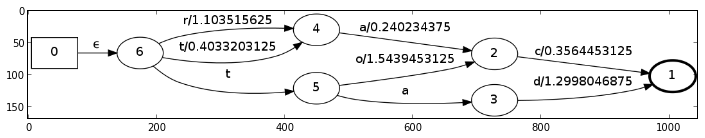

In [77]:
rfst = LFST()
openfst.Reverse(fst,rfst)
show_fst(rfst)

In [78]:
reverse = openfst.vector_logweight()
openfst.ShortestDistance(rfst,reverse)
reverse = array([v.Value() for v in reverse])
print reverse

[ 0.          0.02775919  0.00017603  0.          0.00019905  0.          0.        ]


In [79]:
total = forward+reverse[1:][::-1]
print [exp(-c) for c in total]

[1.0, 0.70016076046423459, 0.27253077452703905, 0.55063689076056477, 0.42202093463650986, 0.94599457146783861]


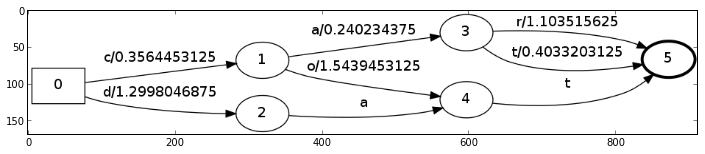

In [80]:
show_fst(fst)

# Baum Welch Training

Given these algorithms, what would Baum Welch look like?